In [62]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense   
from tensorflow.keras.models import load_model

In [63]:
data = pd.read_csv("data.csv")
data

,thu nhập,cố định,nhu cầu,giáo dục,thanh toán nợ,tiết kiệm,bản thân,a,b,c,d,e,f
0,31100000,7600000,0,0,2500000,1,1,0.244373,0.167837,0.258189,0.185919,0.080386,0.063296
1,32800000,13100000,0,0,0,1,0,0.399390,0.178209,0.200063,0.192749,0.000000,0.029588
2,33000000,11200000,0,1,0,1,1,0.339394,0.147579,0.246960,0.170593,0.000000,0.095475
3,34000000,10400000,0,1,1400000,1,1,0.305882,0.196455,0.243392,0.184980,0.041176,0.028115
4,31000000,6500000,0,1,3800000,1,1,0.209677,0.173452,0.311523,0.161639,0.122581,0.021128
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664,29330000,15640000,2,1,0,0,1,0.533242,0.055176,0.177727,0.221468,0.000000,0.010000
2665,26820000,16180000,2,0,0,0,1,0.603281,0.070178,0.154418,0.154034,0.000000,0.020000
2666,27730000,16530000,2,0,0,0,1,0.596105,0.038596,0.180788,0.174285,0.000000,0.010000
2667,28950000,16910000,2,0,0,0,1,0.584111,0.026787,0.162555,0.159409,0.000000,0.070000


In [64]:
data.isnull().sum()

thu nhập         0
cố định          0
nhu cầu          0
giáo dục         0
thanh toán nợ    0
tiết kiệm        0
bản thân         0
a                0
b                0
c                0
d                0
e                0
f                0
dtype: int64

In [65]:
X = np.array(data)[:,0:7]
Y = np.array(data)[:,7:13]
print(X)
print(Y)

[[3.110e+07 7.600e+06 0.000e+00 ... 2.500e+06 1.000e+00 1.000e+00]
 [3.280e+07 1.310e+07 0.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [3.300e+07 1.120e+07 0.000e+00 ... 0.000e+00 1.000e+00 1.000e+00]
 ...
 [2.773e+07 1.653e+07 2.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [2.895e+07 1.691e+07 2.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [2.645e+07 1.746e+07 2.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]]
[[0.24437299 0.16783652 0.25818948 0.18591881 0.08038585 0.06329635]
 [0.39939024 0.17820915 0.20006306 0.1927493  0.         0.02958825]
 [0.33939394 0.14757885 0.24695972 0.17059292 0.         0.09547457]
 ...
 [0.5961053  0.03859579 0.18078764 0.17428451 0.         0.01      ]
 [0.58411054 0.02678687 0.16255465 0.15940921 0.         0.07      ]
 [0.66011342 0.0053385  0.15304779 0.16986224 0.         0.01      ]]


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("Y_train: ",y_train.shape)
print("Y_test: ", y_test.shape)


X_train:  (2135, 7)
X_test:  (534, 7)
Y_train:  (2135, 6)
Y_test:  (534, 6)


In [67]:
# Tính các giá trị thống kê cơ bản
mean = np.mean(X_train, axis=0)
median = np.median(X_train, axis=0)
std_dev = np.std(X_train, axis=0)
min_val = np.min(X_train, axis=0)
max_val = np.max(X_train, axis=0)

# Tạo DataFrame từ các giá trị thống kê
statics_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Std Dev': std_dev,
    'Min Value': min_val,
    'Max Value': max_val
})

# Xếp chúng thành các hàng của các cột
statics_transpose = statics_df.transpose()

# In DataFrame đã xếp
print(statics_transpose)

                      0             1         2         3             4  \
Mean       2.525814e+07  9.793578e+06  0.985948  0.565808  8.371899e+05   
Median     2.545000e+07  9.290000e+06  1.000000  1.000000  0.000000e+00   
Std Dev    8.652026e+06  3.379323e+06  0.811388  0.495650  2.073430e+06   
Min Value  1.003000e+07  4.160000e+06  0.000000  0.000000  0.000000e+00   
Max Value  4.000000e+07  1.993000e+07  2.000000  1.000000  1.300000e+07   

                  5             6  
Mean       0.622951  5.573774e+05  
Median     1.000000  1.000000e+00  
Std Dev    0.484647  1.195762e+06  
Min Value  0.000000  0.000000e+00  
Max Value  1.000000  6.000000e+06  


In [68]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
def ScalerData(data):
    scaler = MinMaxScaler()
    return scaler.fit_transform(data)

In [69]:
X_train = ScalerData(X_train)
X_test = ScalerData(X_test)
print(X_train)
print(X_test)

[[1.13113113e-01 1.49651237e-01 0.00000000e+00 ... 7.69230769e-08
  0.00000000e+00 0.00000000e+00]
 [5.25191859e-01 4.52758402e-01 5.00000000e-01 ... 7.69230769e-02
  1.00000000e+00 0.00000000e+00]
 [9.46613280e-01 3.51299937e-01 0.00000000e+00 ... 4.07692308e-01
  1.00000000e+00 0.00000000e+00]
 ...
 [1.22122122e-01 1.38871275e-01 5.00000000e-01 ... 7.69230769e-08
  1.00000000e+00 0.00000000e+00]
 [8.24157491e-02 1.43944198e-01 1.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [9.79979980e-01 7.69816107e-01 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[7.86381842e-01 8.94039735e-02 5.00000000e-01 ... 0.00000000e+00
  1.00000000e+00 1.66666667e-07]
 [4.97663551e-01 9.13907285e-02 0.00000000e+00 ... 5.98290598e-01
  1.00000000e+00 0.00000000e+00]
 [3.92523364e-01 1.80794702e-01 0.00000000e+00 ... 5.12820513e-01
  1.00000000e+00 0.00000000e+00]
 ...
 [8.33110814e-01 5.19867550e-01 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 1.66666667e-07]

In [70]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

def define_model():
    model = Sequential()
    
    # Layer 1
    model.add(Dense(64, input_dim=7, activation='relu'))
    
    # Layer 2
    model.add(Dense(128, activation='relu'))
    
    model.add(Dropout(0.2))
    
    # Layer 3
    model.add(Dense(128, activation='relu'))
    
    model.add(Dropout(0.2))
    
    # Layer 4
    model.add(Dense(6, activation='relu'))  
    
    model.compile(optimizer="adamax", loss='mean_squared_error')
    
    return model

model = define_model()
model.summary()

c:\Users\vuong\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,118 (102.02 KB)

 Trainable params: 26,118 (102.02 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
from sklearn.ensemble import RandomForestRegressor
def define_model_2():
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    return model

In [72]:
import matplotlib.pyplot as plt

def train_and_plot_loss():
    model = define_model()
    history = model.fit(X_train, y_train, epochs=64, batch_size=1, validation_split=0.2, shuffle=True ,verbose=1)
    model.save('final_model.h5')
    
    # Lấy giá trị loss từ lịch sử huấn luyện
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Vẽ biểu đồ loss của cả hai tập train và validation
    epochs = range(1, len(train_loss) + 1)
    plt.plot(epochs, train_loss, 'b', label='Training loss')  # Đường liên tục màu xanh
    plt.plot(epochs, val_loss, 'r', label='Validation loss')  # Đường liên tục màu đỏ
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [73]:
import joblib
def train2():
    model2 = define_model_2()
    model2.fit(X_train, y_train)
    joblib.dump(model2, 'random_forest_model.pkl')


In [74]:
train2()

Epoch 1/64


c:\Users\vuong\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1708/1708 ━━━━━━━━━━━━━━━━━━━━ 2s 699us/step - loss: 0.0119 - val_loss: 0.0026
Epoch 2/64
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - loss: 0.0032 - val_loss: 0.0016
Epoch 3/64
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 4/64
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - loss: 0.0019 - val_loss: 0.0013
Epoch 5/64
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step - loss: 0.0018 - val_loss: 0.0012
Epoch 6/64
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - loss: 0.0016 - val_loss: 0.0012
Epoch 7/64
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - loss: 0.0015 - val_loss: 0.0011
Epoch 8/64
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - loss: 0.0015 - val_loss: 0.0011
Epoch 9/64
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - loss: 0.0014 - val_loss: 0.0011
Epoch 10/64
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - loss: 0.0013 - val_loss: 0.0010
Epoch 11/64
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - loss: 0.0013 - val_loss: 0.0010
Epoch 12/64
1708/17

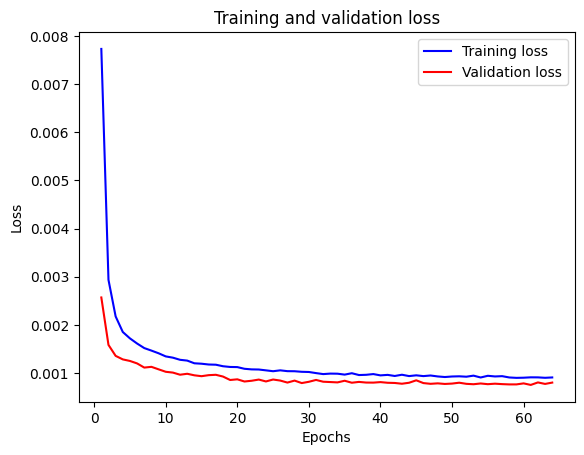

In [75]:
train_and_plot_loss()

In [78]:
import sys
import os
from sklearn.metrics import r2_score

# Load model
model = load_model("final_model.h5")
model2 = joblib.load('random_forest_model.pkl')

# Tính toán R-squared
predict_1 = model.predict(X_test)
r_squared_1 = r2_score(y_test, predict_1)

predict_2 = model2.predict(X_test)
r_squared_2 = r2_score(y_test, predict_2)

print("R-square Neural Network: ", r_squared_1)
print("R-square Random Forest: ", r_squared_2)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
R-square Neural Network:  0.8237761846442678
R-square Random Forest:  0.8227716396694739
